In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"/home/shantaram/RAM/ML/Kaggle Dataset/Benguluru House Price/archive/banglore.csv")
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
data.shape

(13320, 9)

In [6]:
cols = data.columns
cols

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
data["area_type"].value_counts()


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
for i,var in enumerate(cols):
    print(f"--------------------------{var}-----------------------------")
    print(data[var].value_counts())

--------------------------area_type-----------------------------
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------availability-----------------------------
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
19-Jan                     39
18-Oct                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
19-Sep                     21
17-Oct                     21
2

In [9]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

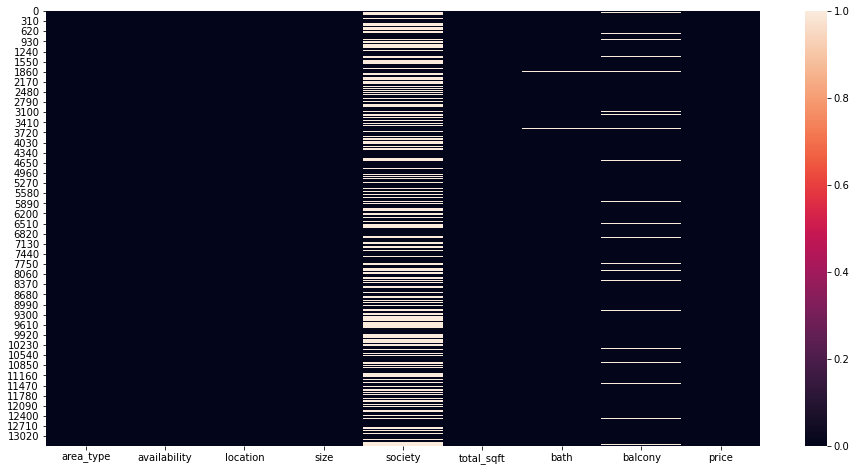

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull())

In [11]:
null_var = data.isnull().sum()* 100/data.shape[0]
null_var

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [12]:
drop_columns  = null_var[null_var >41].keys()
df1 = data.drop(columns = drop_columns)
df1.shape

(13320, 8)

In [13]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

<AxesSubplot:>

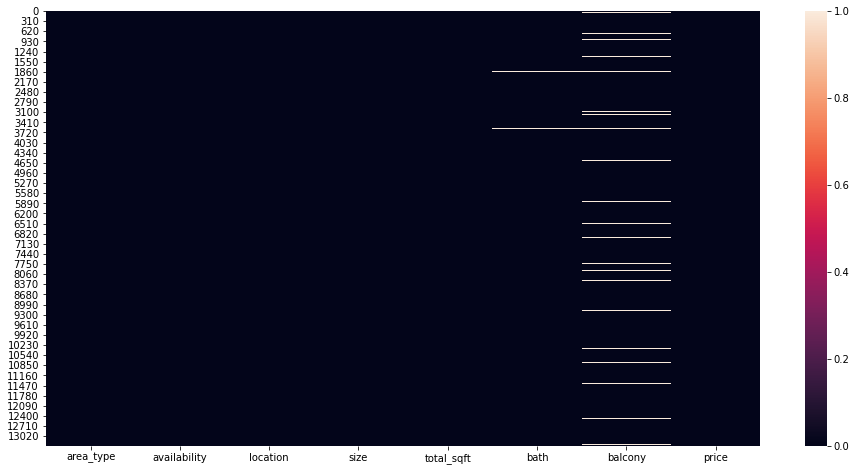

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(df1.isnull())

In [15]:
df1.shape

(13320, 8)

In [16]:
df = df1.dropna()
df.shape

(12710, 8)

<AxesSubplot:>

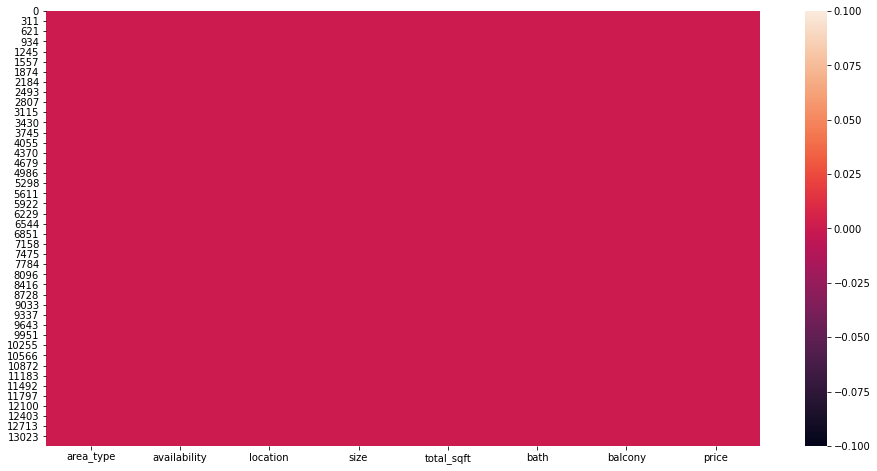

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
X_train1 = df.drop(columns = "price")
y_test1 = df["price"]

In [20]:
new_cols = X_train1.columns
new_cols

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony'],
      dtype='object')

In [21]:
le = LabelEncoder()

In [22]:
le.fit_transform(X_train1["area_type"])

array([3, 2, 0, ..., 0, 3, 3])

In [57]:
X_train1["area_type_new"] = le.fit_transform(X_train1["area_type"])
X_train1.head(50)

area_type   availability                  location       size  \
0   Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1             Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2         Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3   Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4   Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5   Super built-up  Area  Ready To Move                Whitefield      2 BHK   
8   Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
10  Super built-up  Area         18-Feb                Whitefield      3 BHK   
11            Plot  Area  Ready To Move                Whitefield  4 Bedroom   
12  Super built-up  Area  Ready To Move        7th Phase JP Nagar      2 BHK   
13        Built-up  Area  Ready To Move                 Gottigere      2 BHK   
14            Plot  Area  Ready To Move                  Sarjapur  3 Bedroom   
15  Super built-up  Area  Ready To Move               Mysore Road      2 BHK   
16  Super built-up  Area  Ready To Move             Bisuvanahalli      3 BHK   
17  Super built-up  Area  Ready To Move     Raja Rajeshwari Nagar      3 BHK   
18  Super built-up  Area  Ready To Move     Ramakrishnappa Layout      3 BHK   
19  Super built-up  Area  Ready To Move        Manayata Tech Park      2 BHK   
20        Built-up  Area  Ready To Move                   Kengeri      1 BHK   
21  Super built-up  Area         19-Dec                Binny Pete      3 BHK   
22            Plot  Area  Ready To Move               Thanisandra  4 Bedroom   
23  Super built-up  Area  Ready To Move                 Bellandur      3 BHK   
24  Super built-up  Area         18-Nov               Thanisandra       1 RK   
25  Super built-up  Area         18-May           Mangammanapalya      3 BHK   
26  Super built-up  Area  Ready To Move           Electronic City      2 BHK   
27        Built-up  Area         20-Dec                Whitefield      3 BHK   
28  Super built-up  Area         17-Oct          Ramagondanahalli      2 BHK   
29  Super built-up  Area  Ready To Move           Electronic City      3 BHK   
30  Super built-up  Area         19-Dec                 Yelahanka      4 BHK   
31  Super built-up  Area  Ready To Move             Bisuvanahalli      3 BHK   
32  Super built-up  Area  Ready To Move                    Hebbal      3 BHK   
33  Super built-up  Area  Ready To Move     Raja Rajeshwari Nagar      3 BHK   
35  Super built-up  Area         21-Dec            Kanakpura Road      2 BHK   
36  Super built-up  Area  Ready To Move  Electronics City Phase 1      2 BHK   
37  Super built-up  Area  Ready To Move              Kundalahalli      3 BHK   
38  Super built-up  Area  Ready To Move            Chikkalasandra      3 BHK   
39        Built-up  Area  Ready To Move               Uttarahalli      2 BHK   
41  Super built-up  Area         19-Dec            Sarjapur  Road      3 BHK   
42  Super built-up  Area  Ready To Move               Ganga Nagar      1 BHK   
43            Plot  Area  Ready To Move                 Yelahanka  1 Bedroom   
44  Super built-up  Area         19-Sep            Kanakpura Road      2 BHK   
46  Super built-up  Area  Ready To Move              Doddathoguru      2 BHK   
47  Super built-up  Area         20-Sep                Whitefield      2 BHK   
48            Plot  Area  Ready To Move                  KR Puram  2 Bedroom   
49        Built-up  Area  Ready To Move          Himagiri Meadows      2 BHK   
50  Super built-up  Area  Ready To Move              Adarsh Nagar      2 BHK   
51  Super built-up  Area         18-Mar               Bhoganhalli      3 BHK   
52        Built-up  Area  Ready To Move                Whitefield      3 BHK   
53  Super built-up  Area  Ready To Move      Lakshminarayana Pura      2 BHK   
54  Super built-up  Area  Ready To Move                 Yelahanka      3 BHK   
55  Super built

In [24]:
for i,col in enumerate(new_cols):
    X_train1[col+"_new"] = le.fit_transform(X_train1[col])

In [25]:
X_train1.head(5)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony  area_type_new  availability_new  location_new  \
0       1056   2.0      1.0              3                38           407   
1       2600   5.0      3.0              2                77           306   
2       1440   2.0      3.0              0                77          1141   
3       1521   3.0      1.0              3                77           738   
4       1200   2.0      1.0              3                77           697   

   size_new  total_sqft_new  bath_new  balcony_new  
0         9              68         1            1  
1        15            1231         4            3  
2        12             500         1            3  
3        12             581         2            1  
4         9             235         1            1

In [26]:
X_train1.shape

(12710, 14)

In [27]:
dataset = pd.get_dummies(X_train1)
dataset.shape

(12710, 3359)

In [28]:
dataset.head(5)

bath  balcony  area_type_new  availability_new  location_new  size_new  \
0   2.0      1.0              3                38           407         9   
1   5.0      3.0              2                77           306        15   
2   2.0      3.0              0                77          1141        12   
3   3.0      1.0              3                77           738        12   
4   2.0      1.0              3                77           697         9   

   total_sqft_new  bath_new  balcony_new  area_type_Built-up  Area  \
0              68         1            1                         0   
1            1231         4            3                         0   
2             500         1            3                         1   
3             581         2            1                         0   
4             235         1            1                         0   

   area_type_Carpet  Area  area_type_Plot  Area  \
0                       0                     0   
1                       0                     1   
2                       0                     0   
3                       0                     0   
4                       0                     0   

   area_type_Super built-up  Area  availability_14-Jul  availability_14-Nov  \
0                               1                    0                    0   
1                               0                    0                    0   
2                               0                    0                    0   
3                               1                    0                    0   
4                               1                    0                    0   

   availability_15-Aug  availability_15-Dec  availability_15-Jun  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   availability_16-Dec  availability_16-Jan  availability_16-Jul  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   availability_16-Mar  availability_16-Nov  availability_16-Oct  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   availability_16-Sep  availability_17-Apr  availability_17-Aug  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   availability_17-Dec  availability_17-Feb  availability_17-Jan  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   availability_17-Jul  availability_17-Jun  availability_17-Mar  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                   

In [29]:
df2 = pd.get_dummies(dataset, drop_first=True)

In [30]:
X = df2
y = y_test1
y

0          39.070
1         120.000
2          62.000
3          95.000
4          51.000
5          38.000
8          63.250
10         70.000
11        295.000
12         38.000
13         40.000
14        148.000
15         73.500
16         48.000
17         60.000
18        290.000
19         48.000
20         15.000
21        122.000
22        380.000
23        103.000
24         25.250
25         56.000
26         23.100
27         81.000
28         48.770
29         47.000
30        186.000
31         35.000
32        123.000
33         57.390
35         36.000
36         45.500
37        125.000
38         56.120
39         45.000
41         38.000
42         38.000
43         48.000
44         91.790
46         33.000
47         94.820
48        130.000
49         36.000
50         50.000
51         99.000
52         91.000
53         75.000
54         75.000
55         44.000
57        185.000
58        150.000
59         45.000
60        240.000
61         55.000
62        

In [31]:
print(X.shape)
print(y.shape)


(12710, 3359)
(12710,)


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10168, 3359)
(10168,)
(2542, 3359)
(2542,)


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [39]:
lr.coef_

array([ 9.16892553e+13,  3.18739743e+14, -3.37119661e+14, ...,
        3.51360892e+13,  2.48616218e+13,  3.51797380e+13])

In [40]:
lr.intercept_

105.39705524770429

# Value Pridiction

In [58]:
X_test[0,:]

array([-0.49401324, -0.71426245,  0.6149334 , ..., -0.0140262 ,
       -0.00991753, -0.0140262 ])

In [64]:
lr.predict([X_test[10,:]])

array([-4.90909317e+14])

In [63]:
y_prid = lr.predict(X_test)


In [43]:
y_test.head(5)

6773      44.0
8771      83.0
5223     237.0
2871      70.0
11699     30.0
Name: price, dtype: float64

In [44]:
lr.score(X_test,y_prid)

1.0

In [56]:
lr.predict([X_test[5,:]])

array([115.65718708])

In [60]:
dd = pd.DataFrame(y_test)
dd.head
y_test

6773       44.000
8771       83.000
5223      237.000
2871       70.000
11699      30.000
704        98.500
4046       70.000
7798       56.800
9413       42.000
3745      160.000
9625       51.000
9087       67.000
6528      129.000
4799      390.000
9744       65.000
2274      130.000
8906       66.000
422        26.500
361        90.000
4839       59.320
10063      55.000
6376       64.000
6101       48.480
9804      550.000
4612       48.000
8350       29.700
12246      55.000
12436     135.000
10541      33.660
10890      42.600
559       175.000
9116       75.000
5995       81.000
2992      100.000
13111      60.000
7608      125.000
9022       34.000
1830       72.500
5291       55.500
12903      26.500
8898       65.000
9980      118.000
5849      480.000
3078       40.310
9045       40.000
9992       95.000
4274       43.000
4172      170.000
3545       85.000
4134       65.500
6662      233.000
11083      25.880
2042       55.000
10285      33.430
3907       86.000
12534     